# 10주 2강: Estimations

Allen B. Downey의 http://thinkstats2.com 코드를 참조했습니다.

이번 강의는 parameter의 추정에 대해서 배우겠습니다

In [1]:
import numpy as np
import random
from matplotlib import pyplot as plt

## Estimation of Mean
parameter를 추정하는 것을 실제로 해 봅시다.

In [2]:
# 지난 시간에 배운 MSE의 Squre Root 값을 Root mean squared error라고 합니다. 이 값을 구하는 함수를 작성해봅시다
# actual은 실제 값, estimates는 추정값들의 리스트입니다.
def RMSE(estimates, actual):
    e2 = [(estimate-actual)**2 for estimate in estimates]
    mse = np.mean(e2)
    return np.sqrt(mse)

In [3]:
# mean과 median중 population을 더 잘 추정하는 것이 무엇인지 찾아보겠습니다.
# n=7 인 standard gaussian 분포를 1000번 만들고 (mu = 0, sigma = 1), mean과 median의 rmse를 구해봅시다.

def Estimate1(n=7, iters=1000):
    mu = 0
    sigma = 1

    means = []
    medians = []
    for _ in range(iters):
        xs = [random.gauss(mu, sigma) for _ in range(n)]
        xbar = np.mean(xs)
        median = np.median(xs)
        means.append(xbar)
        medians.append(median)

    print('Experiment 1')
    print('rmse xbar', RMSE(means, mu))
    print('rmse median', RMSE(medians, mu))
    
Estimate1()

Experiment 1
rmse xbar 0.3715905159970496
rmse median 0.46611313224662304


In [4]:
# Gaussian은 mean과 median이 같습니다. 하지만 estimator로의 성능은 mean이 median보다 좋습니다.
# 다만, outlier나 큰 data error가 있는 경우에는 median이 더 좋을 떄도 있기는 합니다.

## Estimation of Variance

In [5]:
# 지난 시간에 배웠듯, sample vairance를 통해 모집단의 bariance를 구할 때 분모가 n이 아니라 n-1이라는 사실을 배웠습니다.
# 이를 실제 분포에서 확인해 봅시다. 
# bias 값을 구하는 Mean Error함수를 만들어봅시다.
def MeanError(estimates, actual):
    errors = [estimate-actual for estimate in estimates]
    return np.mean(errors)

In [6]:
# 이제 위 함수를 사용해서 다시 한 번 estimate를 해 봅시다. 
# 이번에는 평균이 아니라 분산을 estimation 합니다.
def Estimate2(n=7, iters=1000):
    mu = 0
    sigma = 1

    estimates1 = []
    estimates2 = []
    for _ in range(iters):
        xs = [random.gauss(mu, sigma) for _ in range(n)]
        biased = np.var(xs) # 지난시간에 분모 n은 biased 라는 것을 배웠습니다.
        unbiased = np.var(xs, ddof=1) # np.var 의 ddof=k는 분모를 n 대신 n-k를 쓰게 해줍니다.
        # ddof 는 delta degree of freedom의 약자입니다. 
        estimates1.append(biased)
        estimates2.append(unbiased)

    print('mean error biased', MeanError(estimates1, sigma**2))
    print('mean error unbiased', MeanError(estimates2, sigma**2))
    

In [7]:
# 분모를 n을 쓰는 경우의 bias에 비해서, n-1인 경우의 bias가 훨씬 작은 것을 알 수 있습니다.
# 여러번 테스트하며 결과를 비교해보세요. n을 증가시키면 unbiased의 error가 더 작아집니다.

## Sampling distribution

In [8]:
# 아래 function은 n = 9인 sample의 xbar를 여러번 (iters 만큼) 구해서, xbars의 리스트를 리턴해주는 함수입니다.
def SimulateSample(mu=90, sigma=7.5, n=9, iters=1000):
    xbars = []
    for j in range(iters):
        xs = np.random.normal(mu, sigma, n)
        xbar = np.mean(xs)
        xbars.append(xbar)
    return xbars

In [9]:
# Mean의 Sampling distribution은 이 sampling마다 얼마나 다른 값을 보여주는지를 나타내 줍니다.
# 지난주 코드에서 values를 통해서 pdf와 cdf를 만드는 코드를 다시 가져와 봅니다. 
def values2cdf(values):
    sorted_values = sorted(values)
    total = len(values)
    x = []
    y = []
    for i, value in enumerate(sorted_values):
        x.append(value)
        y.append(i/total)
    return x, y

def values2pdf(values, bins=10):
    import numpy as np
    tot = len(values)   
    hist, bins = np.histogram(values, bins=bins) 
    xval = bins[:-1] + 0.5 * (bins[1:] - bins[:-1]) # 두 bin 사이의 점을 고릅니다
    binsizes = (bins[1:] - bins[:-1]) # binsize가 uniform이 아니더라도 쓸 수 있도록
    pdf = hist / (tot * binsizes)
    return xval, pdf

def getPercentileValueFromCDF(cdf, percentile):
    cdf[percentile*len(cdf)//100]
    return cdf[percentile*len(cdf)//100]

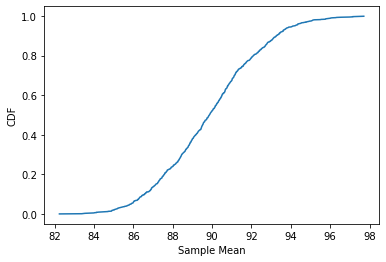

In [10]:
# 먼저 CDF를 그려봅니다.
# SimulateSample에서 n을 바꾸면서 실험해보세요.
# n이 커질수록 폭이 작아지는 것을 확인할 수 있습니다.
# xbars = SimulateSample(n = 100)
xbars = SimulateSample()
x, y = values2cdf(xbars)
plt.plot(x, y)
plt.xlabel("Sample Mean")
plt.ylabel("CDF")
plt.show()

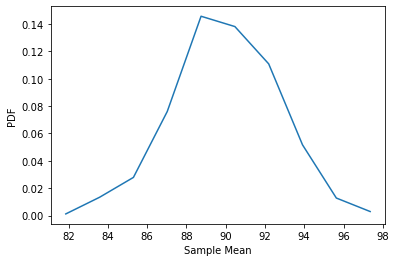

In [11]:
# 이제 PDF를 그려봅니다.
# SimulateSample에서 n을 바꾸면서 실험해보세요.
# n이 커질수록 폭이 작아지는 것을 확인할 수 있습니다.
# xbars = SimulateSample(n = 100)
xbars = SimulateSample()
x, y = values2pdf(xbars)
plt.plot(x, y)
plt.xlabel("Sample Mean")
plt.ylabel("PDF")
plt.show()

In [12]:
# sample mean의 mean은 실제 gaussian distribution의 mean값과 비슷한 값이 나오는 것을 알 수 있습니다.
np.mean(xbars)

89.9328835563894

In [13]:
# sampling value의 n%가 포함되는 x값의 n% confidence interval이라고 합니다.
# 90% confidence interval은 percentile기준 5%부터 95%까지겠지요.
cdf, xval = values2cdf(xbars)
ci_90 = getPercentileValueFromCDF(x, 5), getPercentileValueFromCDF(x, 95)
ci_90

(81.85679984841012, 97.35731379492417)

In [14]:
# 지난 시간에 배웠듯 Sample Mean의 RMSE를 때때로 Standard Error라고 부릅니다.
stderr = RMSE(xbars, 90) # 90은 분포의 실제 평균입니다.
stderr

2.6029117775523143

In [15]:
# Confidence Interval과 Standard Error를 통해서 random sampling에 대해서 estamator가 얼마나 변동성이 있는지를 정량화 가능합니다.

## Tailed distributions: Exponential distribution

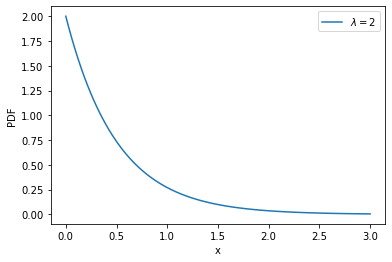

In [16]:
# 위의 예제는 mean과 median이 같고, 대칭인 gaussian distribution들에 대해서 수행했습니다.
# 한쪽 꼬리가 긴 exponential distribution은 어떻게 다를까요?
# 일단 잊으셨을까봐 exponential distribution을 그려보겠습니다. 
lam = 2
x = np.linspace(0, 3, 100) #np.linspace(a, b, n) = a와 b사이에 일정한 간격으로 n개의 요소를 만듭니다
y = lam * np.exp(-1 * lam * x)
plt.plot(x, y, label=f"$\lambda=${lam}")
plt.legend()
plt.xlabel("x")
plt.ylabel("PDF")
plt.show()
plt.close()

In [17]:
# 지수 분포의 평균은 일반적으로 1/lambba 입니다. 이를 역산해서 estimator를 L = 1 / xbar로 정의할 수 있습니다. (methods of moment)
# 이 값은 사실 exponential distribution의 maximum likeliehood estimator입니다. 
# 하지만, outlier가 있다면 mean값은 변동성이 심한 것을 우리는 미리 알고 있습니다.
# 지수 분포의 중위 수는 ln(2)/lambda로 정의할 수 있습니다. 이를 역산하면 Lm = ln(2) / median으로 다른 estimator를 구할 수 있습니다.
# 두 가지로 구한 lambda 값 중 어느 것이 더 정확한지 봅시다. 

def Estimate3(n=7, iters=1000):
    lam = 2

    means = []
    medians = []
    for _ in range(iters):
        xs = np.random.exponential(1.0/lam, n) # exponential random varianble을 n개 만듭니다.
        L = 1 / np.mean(xs)
        Lm = np.log(2) / np.median(xs)
        means.append(L)
        medians.append(Lm)

    print('rmse L', RMSE(means, lam))
    print('rmse Lm', RMSE(medians, lam))
    print('mean error L', MeanError(means, lam))
    print('mean error Lm', MeanError(medians, lam))

Estimate3()

rmse L 1.0161237657177975
rmse Lm 1.6767133501057006
mean error L 0.3214541522334408
mean error Lm 0.4794287408770769


In [18]:
# mean이 median보다 정확한 것을 알 수 있습니다. 하지만 둘 모두 unbiased는 아닌 것 같습니다.
# nonlinear function의 parameter를 추정하는 것은 꽤나 어렵습니다.
# 괜찬습니다. 이번주부터 시작해서 다음 몇 주간 어떤 식으로 원 분포를 추정하는지에 대한 방법들을 조금 더 배우면 됩니다.

## Excercises

**Exercise:** $\lambda=2$인 exponential distribution에서 n=10인 sample들을 뽑는다고 생각해 봅시다. 1000 번 정도 sampling을 해 보고, estimator L의 sampling distribution을 그려봅시다. 그리고 standard error를 구해보고, 90% confidence interval도 구해봅시다. 

n을 바꾸면 어떻게 변할까요? 그리고 n을 바꿔서 standard error의 변화를 plot해봅시다. 

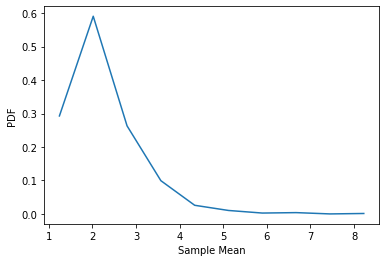

(1.2442218806848122, 8.2226984268862)

In [19]:
# solution goes here
# Estimator L의 sampling distribution을 구해봅시다.
def SimulateSample2(lam=2, n=10, iters=1000):
    Ls = []
    for j in range(iters):
        xs = np.random.exponential(1.0/lam, n) # exponential random varianble을 n개 만듭니다.
        L = 1 / np.mean(xs)
        Ls.append(L)
    return Ls

xbars = SimulateSample2()
x, y = values2pdf(xbars)
plt.plot(x, y)
plt.xlabel("Sample Mean")
plt.ylabel("PDF")
plt.show()

cdf, xval = values2cdf(xbars)
ci_90 = getPercentileValueFromCDF(x, 5), getPercentileValueFromCDF(x, 95)
ci_90

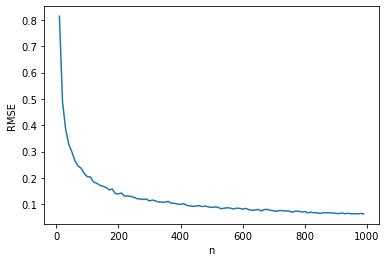

In [20]:
# Solution goes here
# n을 바꾸어 가며 RMSE를 구해봅시다. 
rmses = []
ns = range(10, 1000, 10)
for i in ns:
    rmses.append(RMSE(SimulateSample2(n=i), 2))
plt.plot(ns, rmses)
plt.xlabel("n")
plt.ylabel("RMSE")
plt.show()

**Exercise:** 몇 주 전 distribution 강의에서 말씀드렸듯, 축구나 하키같은 구기종목의 골 사이 간격은 대략적으로 exponential 분포를 따릅니다. 그리고 어떤 팀의 득점 rate는 각 게임에서 그 팀이 얻어낸 골의 수로 알 수가 있습니다. 이 추정은 사실 시간 간격을 샘플링 하는 것과는 조금 다릅니다. 실제의 골 수에 따라서 lambda를 추정해봅시다. 

아래의 함수는 골 scoring rate lam을 받아서 몇 골을 넣었는지를 시뮬레이션 해 주는 함수입니다. 이 함수를 이용해서 L의 mean error와 rmse를 구해봅시다. 이 estimator는 biased인가요 unbiased인가요?

In [21]:
def SimulateGame(lam):
    goals = 0
    t = 0
    while True:
        time_between_goals = random.expovariate(lam)
        t += time_between_goals
        if t > 1:
            break
        goals += 1
    # estimated goal-scoring rate는 실제로 goal을 넣은 수와 같아집니다.
    L = goals
    return L

In [22]:
# Solution goes here
# 먼저 rmse와 mean error를 구하는 함수를 만들어봅시다. 
def Estimate4(lam=2, m=1000000):

    estimates = []
    for i in range(m):
        L = SimulateGame(lam)
        estimates.append(L)

    print('Experiment 4')
    print('rmse L', RMSE(estimates, lam))
    print('mean error L', MeanError(estimates, lam))
    return MeanError(estimates, lam)

Estimate4()

Experiment 4
rmse L 1.4140845094972223
mean error L -0.000497


-0.000497

Experiment 4
rmse L 0.8944271909999159
mean error L 0.0
Experiment 4
rmse L 1.466287829861518
mean error L 0.13
Experiment 4
rmse L 1.4092551223962253
mean error L 0.002
Experiment 4
rmse L 1.402212537385114
mean error L -0.0164
Experiment 4
rmse L 1.4157542159569931
mean error L -0.00144
Experiment 4
rmse L 1.4150618361046983
mean error L 0.000592


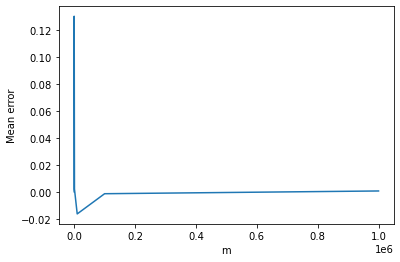

In [23]:
# Solution goes here 
# m을 바꾸어 가면서 mean error를 그려봅시다.
# Mean error가 0에 점점 가까워지네요.
# unbiased로 추정됩니다.
rmses = []
ns = [10*10**a for a in range(6)]
for i in ns:
    rmses.append(Estimate4(m=i))
plt.plot(ns, rmses)
plt.xlabel("m")
plt.ylabel("Mean error")
plt.show()